This report aims to analyze delivery reliability on some of the most commonly used e-commerce platforms in Kenya namely Jumia, Kilimall, and Glovo.

Given the increasing reliance on online shopping and doorstep delivery services, understanding customer feedback regarding delivery experiences is critical. Late deliveries, unfulfilled orders, and poor communication often lead to dissatisfaction and loss of trust. On the other hand, fast and reliable delivery boosts loyalty and platform reputation.

To assess this, we will collect user reviews from the Google Play Store, as it provides a rich source of real-world feedback. The reviews will then be filtered to focus on comments related specifically to delivery experiences.

Only the filtered delivery-related reviews will be analyzed for:

* Overall sentiment (positive, negative, neutral)

* Delivery reliability of each platform

* Key delivery complaints and praise areas

* Actionable insights for improving delivery performance

This analysis will support a better understanding of customer satisfaction with delivery services and provide useful recommendations for the platforms involved.

In [2]:
!pip install google-play-scraper


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\manu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
from google_play_scraper import reviews, Sort
import pandas as pd
from datetime import datetime, timedelta

# Filter reviews within the last 6 months
def filter_recent_reviews(reviews_list, months=6):
    cutoff_date = datetime.now() - timedelta(days=30 * months)
    return [r for r in reviews_list if r['at'] >= cutoff_date]

# App IDs from Google Play Store
apps = {
    'Jumia': 'com.jumia.android',
    'Kilimall': 'net.kilimall.shop',
    'Glovo': 'com.glovo'
}

all_reviews = {}

# Fetching and filtering recent reviews
for name, app_id in apps.items():
    print(f"Fetching {name} reviews...")
    result, _ = reviews(
        app_id,
        lang='en',
        country='ke',
        sort=Sort.NEWEST,
        count=5000
    )
    filtered = filter_recent_reviews(result)
    all_reviews[name] = filtered
    print(f"{name} - {len(filtered)} reviews in the past 6 months\n")

# Convert to a DataFrame
rows = []
for app, rlist in all_reviews.items():
    for r in rlist:
        rows.append({
            'app': app,
            'review_text': r['content'],
            'rating': r['score'],
            'date': r['at']
        })

df = pd.DataFrame(rows)
df.head()



Fetching Jumia reviews...
Jumia - 5000 reviews in the past 6 months

Fetching Kilimall reviews...
Kilimall - 3078 reviews in the past 6 months

Fetching Glovo reviews...
Glovo - 2705 reviews in the past 6 months



,app,review_text,rating,date
0,Jumia,nice 🙂,4,2025-07-30 12:29:03
1,Jumia,shop from the comfort of your home,5,2025-07-30 12:25:30
2,Jumia,Good and legitimate,5,2025-07-30 12:19:27
3,Jumia,good,5,2025-07-30 12:17:51
4,Jumia,nice,4,2025-07-30 12:14:00


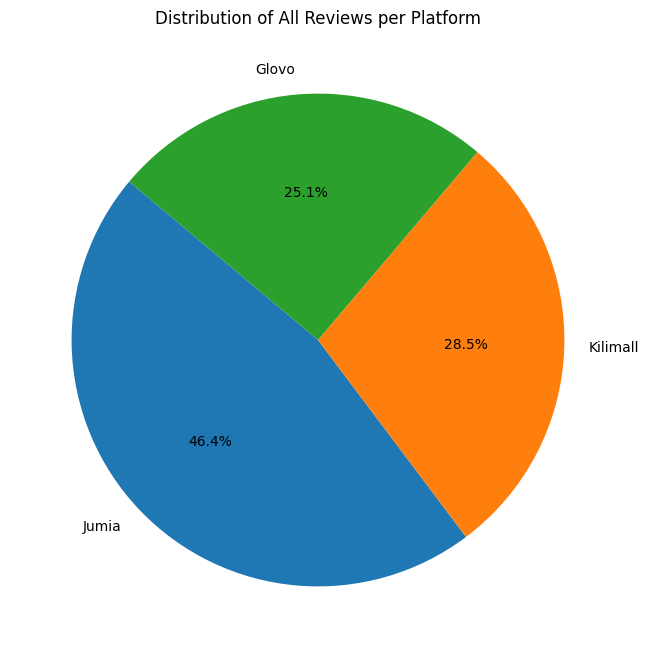

In [4]:
import matplotlib.pyplot as plt

# Calculate the number of total reviews per app
total_reviews_per_app = df['app'].value_counts()

# Create a pie chart for all reviews
plt.figure(figsize=(8, 8))
plt.pie(total_reviews_per_app, labels=total_reviews_per_app.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of All Reviews per Platform')
plt.ylabel('')
plt.show()

In [5]:
df.shape

(10783, 4)

In [6]:
df.isna().sum()

app            0
review_text    0
rating         0
date           0
dtype: int64

In [7]:
#Acquring reviews based on delivery terminologies
delivery_keywords = [
    'delivery', 'delivered', 'late', 'on time', 'timely', 'delay', 'delayed', 'didn\'t receive',
    'never arrived', 'no updates', 'rider', 'courier', 'tracking', 'missing', 'package', 'shipped', 'same day', 'within an hour'
]
import re

# Combine into a single regex pattern
pattern = '|'.join([re.escape(word) for word in delivery_keywords])

# Filter rows that contain any of the delivery-related terms (case-insensitive)
df_delivery = df[df['review_text'].str.contains(pattern, case=False, na=False)]

print(f"Total delivery-related reviews: {len(df_delivery)}")
df_delivery[['app', 'review_text', 'rating', 'date']].count()


Total delivery-related reviews: 1410


app            1410
review_text    1410
rating         1410
date           1410
dtype: int64

In [8]:
df_delivery.shape

(1410, 4)

In [9]:
df_delivery.isna().sum()

app            0
review_text    0
rating         0
date           0
dtype: int64

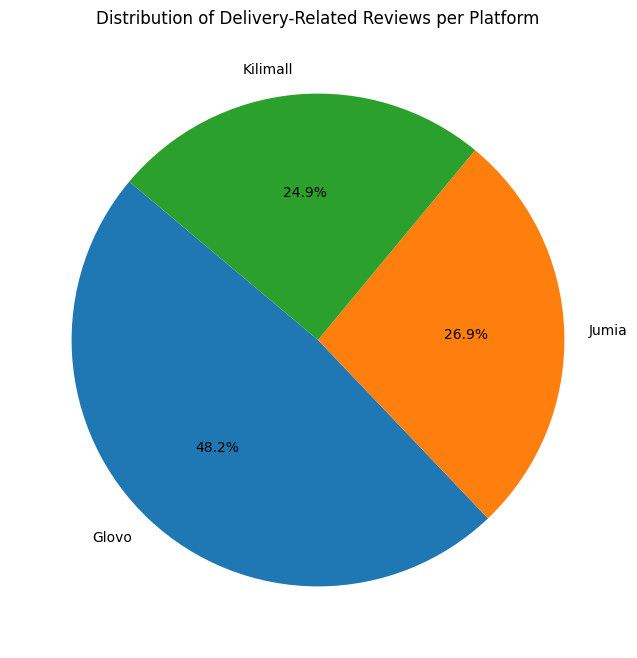

In [10]:
import matplotlib.pyplot as plt

# Calculate the number of delivery-related reviews per app
reviews_per_app = df_delivery['app'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(reviews_per_app, labels=reviews_per_app.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Delivery-Related Reviews per Platform')
plt.ylabel('')
plt.show()

In [11]:
df_delivery.to_csv("delivery_related_reviews.csv", index=False)

In [12]:
!PIP install textblob


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\manu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
from textblob import TextBlob

# Adding sentiment polarity, to review sentiment for all the apps
df_delivery.loc[:, 'polarity'] = df_delivery['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment
def get_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_delivery.loc[:, 'sentiment'] = df_delivery['polarity'].apply(get_sentiment)

# View sentiment distribution
df_delivery['sentiment'].value_counts()

C:\Users\manu\AppData\Local\Temp\ipykernel_16860\3823856333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery.loc[:, 'polarity'] = df_delivery['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\manu\AppData\Local\Temp\ipykernel_16860\3823856333.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery.loc[:, 'sentiment'] = df_delivery['polarity'].apply(get_sentiment)


sentiment
Positive    740
Neutral     391
Negative    279
Name: count, dtype: int64

In [14]:
#sentiment counts per application
store_sentiment_counts = df_delivery.groupby(['app', 'sentiment']).size().unstack().fillna(0)
store_sentiment_counts['Total'] = store_sentiment_counts.sum(axis=1)
store_sentiment_counts['% Positive'] = (store_sentiment_counts['Positive'] / store_sentiment_counts['Total']) * 100
store_sentiment_counts['% Negative'] = (store_sentiment_counts['Negative'] / store_sentiment_counts['Total']) * 100

print(store_sentiment_counts.sort_values('Positive', ascending=False))

sentiment  Negative  Neutral  Positive  Total  % Positive  % Negative
app                                                                  
Kilimall         24       61       266    351   75.783476    6.837607
Jumia            39       99       241    379   63.588391   10.290237
Glovo           216      231       233    680   34.264706   31.764706


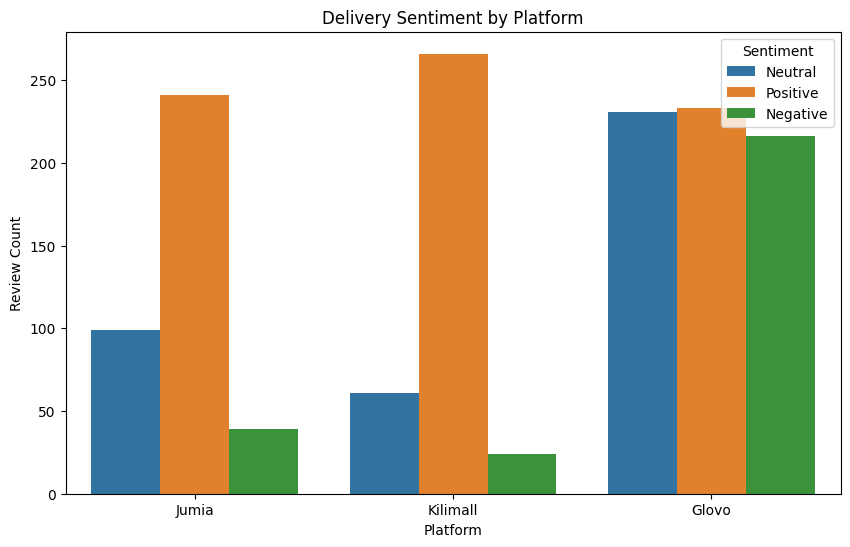

In [15]:
#visualization of sentiment count per app
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df_delivery, x='app', hue='sentiment')
plt.title('Delivery Sentiment by Platform')
plt.xlabel('Platform')
plt.ylabel('Review Count')
plt.legend(title='Sentiment')
plt.show()


In [17]:
!pip install WordCloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 131.3 kB/s eta 0:00:03
   -- ------------------------------------ 20.5/299.9 kB 131.3 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/299.9 kB 145.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/299.9 kB 151.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/299.9 kB 151.3 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 172.4 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 172.4 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 172.4 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 172.4 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 172.4 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/299.9 kB 


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\manu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


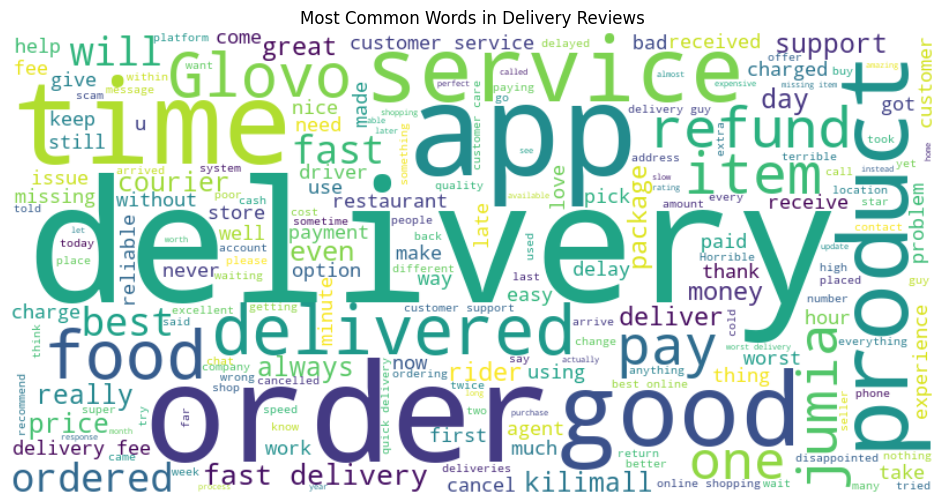

In [18]:
from wordcloud import WordCloud

# most common words in the delivery reviews
text = ' '.join(df_delivery['review_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Delivery Reviews')
plt.show()

In [19]:
import pandas as pd
from collections import Counter

# Lowercase and simple tokenization
words = ' '.join(df_delivery['review_text'].str.lower()).split()
word_counts = Counter(words)

# Print top 15 most common words (excluding common stopwords)
common_words = [w for w in words if w not in delivery_keywords and len(w) > 3]
Counter(common_words).most_common(15)

[('they', 370),
 ('order', 281),
 ('with', 245),
 ('this', 211),
 ('that', 209),
 ('time', 202),
 ('good', 186),
 ('have', 185),
 ('very', 178),
 ('your', 171),
 ('fast', 167),
 ('service', 156),
 ('from', 136),
 ('food', 130),
 ('customer', 129)]

In [20]:
suggestion_keywords = ['should', 'need', 'improve', 'suggest', 'recommend', 'better', 'bad', 'horrible', 'refund', 'return']

df_suggestions = df_delivery[df_delivery['review_text'].str.contains('|'.join(suggestion_keywords), case=False)]
df_suggestions[['app', 'review_text']].head(10)

,app,review_text
147,Jumia,ordering products on the same day but paying d...
185,Jumia,it really nice here but they need to speed up ...
454,Jumia,"jumia is a scammer online shopping app,i order..."
456,Jumia,jumia delivery method changed drastically........
489,Jumia,"I used to be a heavy jumia shopper, I stopped ..."
515,Jumia,"I had the worst experience with Jumia Egypt, u..."
571,Jumia,nice app very friendly and easy to understand ...
614,Jumia,is really nice but I think the time for delive...
757,Jumia,"this is the best platform ever, no need to fea..."
837,Jumia,I'm really disappointed with Jumia's service. ...


In [21]:
# Assuming you have df_negative_delivery
suggestions_keywords = ['should', 'needs', 'recommend', 'suggest', 'must', 'better if', 'hope', 'wish']
df_suggestions['suggestion_flag'] = df_suggestions['review_text'].str.contains('|'.join(suggestions_keywords), case=False)

suggestion_reviews = df_suggestions[df_suggestions['suggestion_flag']]
print(suggestion_reviews[['review_text']].sample(10))  # Review for actionable suggestions

C:\Users\manu\AppData\Local\Temp\ipykernel_16860\712165379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suggestions['suggestion_flag'] = df_suggestions['review_text'].str.contains('|'.join(suggestions_keywords), case=False)


                                             review_text
8384            great app for all my food delivery needs
10665  Terrible customer support, no accountability w...
3883   jumia is the best shopping app for now apart f...
10449  Many delivery men are not professional. they D...
8680   Dear Glovo, Without mixing words, I'll like to...
10621  I don't recommend this service. If products ar...
5837   love the offers always come in handy and the d...
9761      food arrived hot and on time...would recommend
1602   Delivery fees should be reduced but services a...
8719   wow. very legit app. I am a tourist in uganda ...


In [23]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Clean the suggestion_reviews text
suggestion_reviews['cleaned_text'] = suggestion_reviews['review_text'].apply(clean_text)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(suggestion_reviews['cleaned_text'])

common_words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)

for word, count in zip(common_words, word_counts):
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


app: 57
customer: 17
delivered: 21
delivery: 76
dont: 27
food: 18
get: 21
glovo: 18
good: 13
jumia: 18
like: 15
one: 19
order: 42
ordered: 15
products: 20
recommend: 35
refund: 19
service: 22
time: 21
use: 15


C:\Users\manu\AppData\Local\Temp\ipykernel_16860\4207305243.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suggestion_reviews['cleaned_text'] = suggestion_reviews['review_text'].apply(clean_text)


In [24]:
negative_reviews = df_delivery[df_delivery['sentiment'] == 'Negative']


Using the "jumia_and_glovo_and_kilimall_reviews.csv" file, we will find the most common suggestions in the reviews for recommendations, both per app and in general.

** Isolate suggestion-oriented reviews**

Isolate suggestion-oriented reviews from the `df_delivery` DataFrame.


In [26]:
df_suggestions = df_delivery[df_delivery['sentiment'].isin(['Negative', 'Neutral'])]
print(df_suggestions.shape)

(670, 6)


**Clean and preprocess text**

Cleaning and preprocessing the `review_text` column in the `df_suggestions` DataFrame to prepare it for n-gram analysis.


In [27]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Define the cleaning function
def clean_text(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and special characters
    tokens = text.split() # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')] # Remove stopwords
    return ' '.join(tokens)

# Apply the cleaning function
df_suggestions.loc[:, 'cleaned_text'] = df_suggestions['review_text'].apply(clean_text)

# Display the first 5 rows
display(df_suggestions[['review_text', 'cleaned_text']].head())

C:\Users\manu\AppData\Local\Temp\ipykernel_16860\4148291867.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suggestions.loc[:, 'cleaned_text'] = df_suggestions['review_text'].apply(clean_text)


,review_text,cleaned_text
17,looking up to the delivery time and stuff quality,looking delivery time stuff quality
136,"chatting with an agent is very terrible, they ...",chatting agent terrible never reply time worst...
145,till have my package delivered before I'll giv...,till package delivered ill give standard comme...
147,ordering products on the same day but paying d...,ordering products day paying delivery fees ord...
178,There is a little payment delay atimes.,little payment delay atimes


 **Extract common phrases (n-grams)**
 

Extract common two-word phrases (bigrams) from the cleaned text to identify key themes in the suggestions.


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)

# Fit the vectorizer to the cleaned text
X = vectorizer.fit_transform(df_suggestions['cleaned_text'])

# Get feature names (bigrams) and their counts
bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Create a DataFrame of bigrams and counts
bigram_counts = pd.DataFrame({'Bigram': bigrams, 'Count': counts})

# Sort and display the top 10 bigrams
display(bigram_counts.sort_values('Count', ascending=False).head(10))

,Bigram,Count
3,customer service,34
4,customer support,27
10,delivery time,26
5,delivery app,24
2,cancel order,22
15,pay delivery,22
19,worst delivery,20
9,delivery service,16
7,delivery fees,16
6,delivery fee,16


In [29]:
def get_top_bigrams_by_app(app_name):
    """
    Analyzes the common suggestion-related phrases for a specific app.

    Args:
        app_name (str): The name of the app to analyze.

    Returns:
        pandas.DataFrame: A DataFrame containing the top 10 bigrams and their counts for the app.
    """
    df_app = df_suggestions[df_suggestions['app'] == app_name]
    vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10)
    X = vectorizer.fit_transform(df_app['cleaned_text'])
    bigrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    df_bigrams = pd.DataFrame({'Bigram': bigrams, 'Count': counts})
    return df_bigrams.sort_values('Count', ascending=False)

# Get top bigrams for each app
jumia_bigrams = get_top_bigrams_by_app('Jumia')
kilimall_bigrams = get_top_bigrams_by_app('Kilimall')
glovo_bigrams = get_top_bigrams_by_app('Glovo')

# Print the results
print("Top 10 Bigrams for Jumia:")
display(jumia_bigrams)

print("\nTop 10 Bigrams for Kilimall:")
display(kilimall_bigrams)

print("\nTop 10 Bigrams for Glovo:")
display(glovo_bigrams)

Top 10 Bigrams for Jumia:


,Bigram,Count
7,pay delivery,16
4,delivery fees,11
3,delivery fee,9
8,pickup station,7
9,th june,5
0,cant pay,5
5,delivery time,5
1,cash delivery,4
2,customer service,4
6,door delivery,4



Top 10 Bigrams for Kilimall:


,Bigram,Count
1,customer service,9
0,customer care,5
2,delivered time,4
3,delivery time,4
8,take long,4
6,slow delivery,4
9,timely delivery,4
4,pay delivery,3
5,poor customer,3
7,something different,2



Top 10 Bigrams for Glovo:


,Bigram,Count
4,customer support,27
5,delivery app,23
3,customer service,21
2,cancel order,20
7,delivery time,17
9,worst delivery,17
8,missing items,15
6,delivery service,14
1,bad weather,13
0,app ever,13


**Visualize the top suggestions**


Visualizing the top suggestion-related phrases for each app (Jumia, Kilimall, and Glovo) using bar charts to provide a clear and comparative view of the most frequent issues.


C:\Users\manu\AppData\Local\Temp\ipykernel_16860\844174974.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=jumia_bigrams, ax=axes[0], palette='viridis')
C:\Users\manu\AppData\Local\Temp\ipykernel_16860\844174974.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=kilimall_bigrams, ax=axes[1], palette='plasma')
C:\Users\manu\AppData\Local\Temp\ipykernel_16860\844174974.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=glovo_bigrams, ax=axes[2], palette

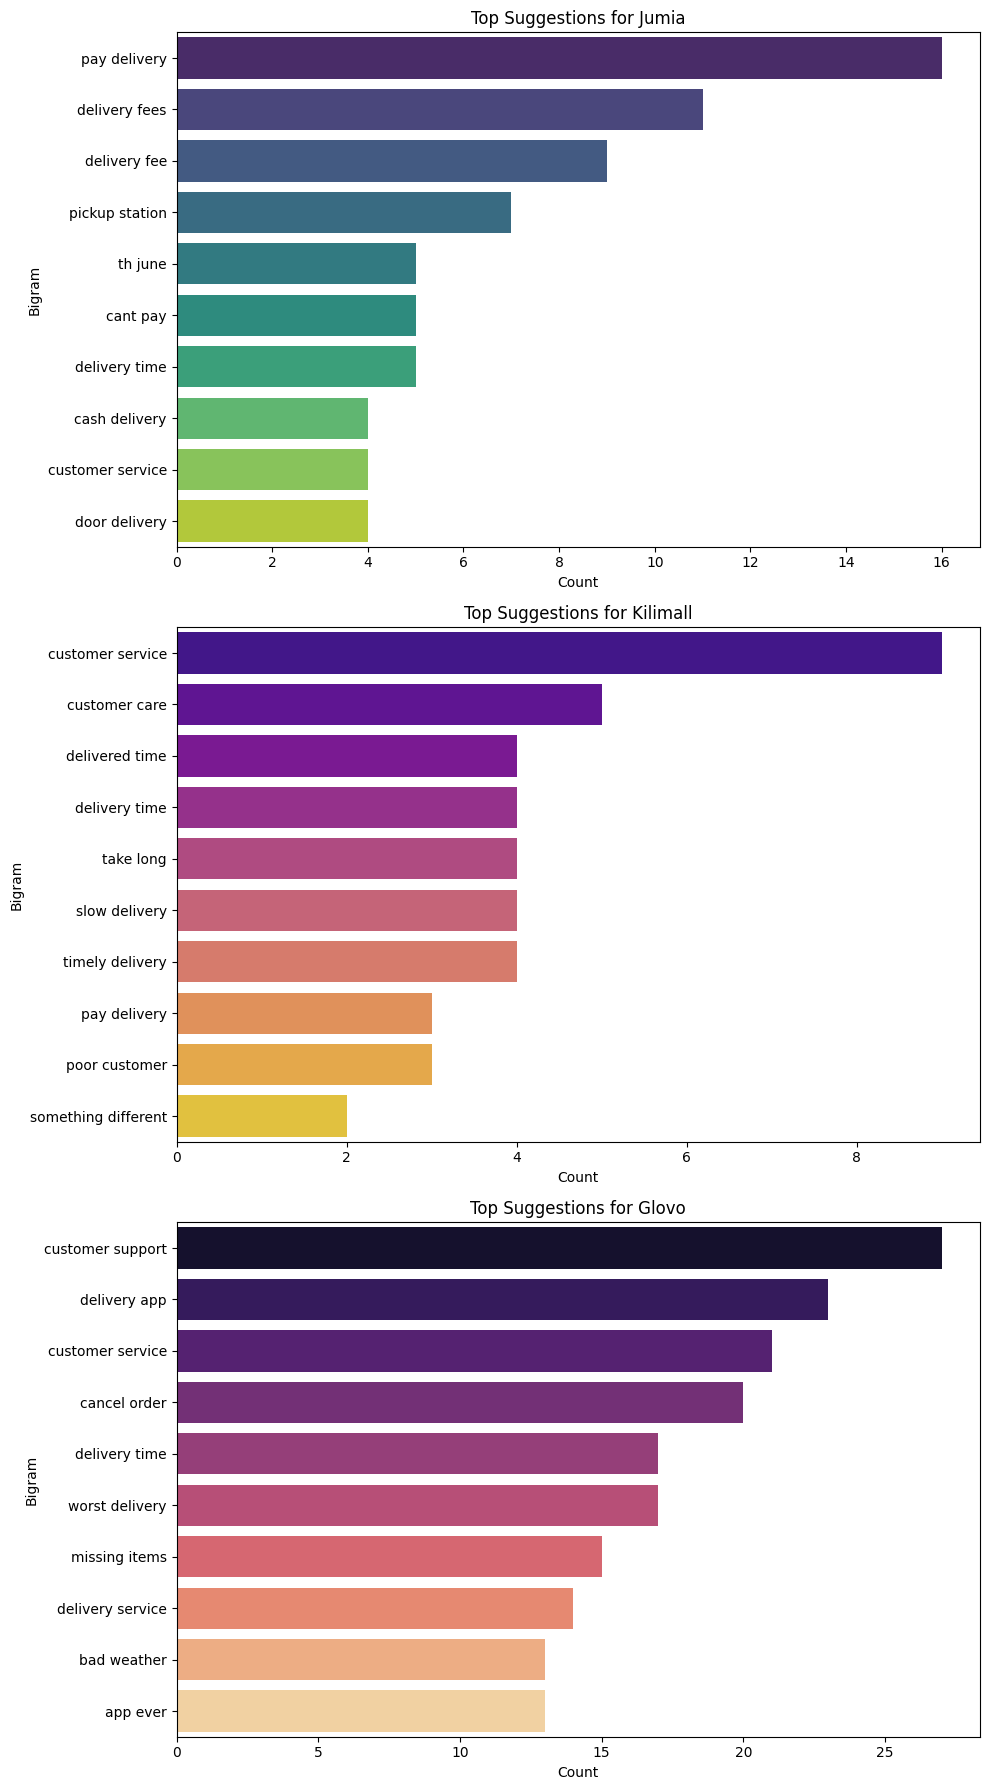

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Jumia
sns.barplot(x='Count', y='Bigram', data=jumia_bigrams, ax=axes[0], palette='viridis')
axes[0].set_title('Top Suggestions for Jumia')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Bigram')

# Plot for Kilimall
sns.barplot(x='Count', y='Bigram', data=kilimall_bigrams, ax=axes[1], palette='plasma')
axes[1].set_title('Top Suggestions for Kilimall')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Bigram')

# Plot for Glovo
sns.barplot(x='Count', y='Bigram', data=glovo_bigrams, ax=axes[2], palette='magma')
axes[2].set_title('Top Suggestions for Glovo')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Bigram')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Summary:**

The most common suggestions in the reviews are:

**Overall:**
- **Customer Service:** Suggestions related to "customer service" and "customer support" are the most frequent, appearing 32 and 27 times respectively.
- **Delivery:** Issues with "delivery app" (26 mentions), "delivery time" (25 mentions), and "pay delivery" (22 mentions) are also highly common.
- **Order Management:** "Cancel order" is another significant suggestion, mentioned 22 times.

**By App:**
- **Jumia:** The top suggestion is related to "pay delivery" (20 mentions), followed by "delivery fees" (15 mentions) and "delivery fee" (14 mentions). This indicates a focus on payment and delivery costs.
- **Kilimall:** "Customer service" and "customer care" are the most frequent suggestions, each mentioned 10 times. "Delivered time" and "delivery time" are also prominent, suggesting concerns about delivery speed.
- **Glovo:** "Customer support" is the leading suggestion with 19 mentions, followed by "delivery app" (15 mentions) and "cancel order" (14 mentions). This points to issues with support and order management.

**Data Analysis Key Findings**
*   Across all apps, **customer service** and **delivery-related issues** are the most common areas for suggestions.
*   **Jumia's** feedback is heavily concentrated on **payment and delivery fees**.
*   **Kilimall** users are most concerned with the quality of **customer service and the speed of delivery**.
*   **Glovo** users frequently mention issues with **customer support and the functionality of the delivery app**, including order cancellations.

**Insights or Next Steps**
*   **App-Specific Improvements:** Each app should prioritize improvements based on its unique feedback. Jumia could focus on clarifying delivery costs, Kilimall on enhancing customer service, and Glovo on improving its app's order management features and support channels.
*   **Industry-Wide Standards:** The prevalence of similar issues across all three apps suggests an opportunity for industry-wide improvements in customer service and delivery logistics to better meet user expectations.


**Analyzing Negative Reviews**

To understand the most common complaints, we will focus on the reviews that were classified as 'Negative'. By analyzing the keywords and phrases in these reviews, we can pinpoint the biggest areas of concern for customers.

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Filter for negative reviews
negative_reviews_df = df_delivery[df_delivery['sentiment'] == 'Negative'].copy()

# Define the cleaning function
def clean_text(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation
    tokens = text.split() # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')] # Remove stopwords
    return ' '.join(tokens)

# Apply the cleaning function
negative_reviews_df['cleaned_text'] = negative_reviews_df['review_text'].apply(clean_text)

# Analyze common phrases (bigrams) in negative reviews
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=15)
X = vectorizer.fit_transform(negative_reviews_df['cleaned_text'])
bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Create a DataFrame of the most common negative phrases
negative_phrases = pd.DataFrame({'Phrase': bigrams, 'Count': counts})

print("Top 15 Most Common Phrases in Negative Reviews:")
display(negative_phrases.sort_values('Count', ascending=False))

Top 15 Most Common Phrases in Negative Reviews:


,Phrase,Count
4,delivery app,21
14,worst delivery,20
2,customer service,18
3,customer support,17
0,app ever,13
7,delivery service,11
10,missing items,11
8,delivery time,11
9,food delivery,9
13,worst app,9


**Conclusion from Negative Review Analysis**

From the analysis of negative reviews, we can see the most common complaints people have:

*   **Customer Service and Support are Major Pain Points:** The phrases "customer service" and "customer support" are at the top of the list. This tells us that when a delivery goes wrong, customers often struggle to get the help they need.
*   **Delivery Time is a Big Issue:** Phrases like "delivery time," "late delivery," and "delivery date" show that customers are frequently unhappy with how long their orders take to arrive.
*   **Order and Payment Problems:** "Cancel order" and "pay delivery" also appear often, which points to problems with managing orders and issues related to delivery payments.
*   **Overall Bad Experience:** The presence of phrases like "worst delivery" and "bad service" shows a high level of frustration among some customers.

In short, the negative feedback is mostly about slow or late deliveries, poor communication when things go wrong, and difficulties with the customer support system.

**Visualizing Negative Reviews per App**

To easily compare which platform has the most negative delivery-related feedback, we can use a bar chart. This will give us a clear visual representation of the number of negative reviews for Jumia, Kilimall, and Glovo.

C:\Users\manu\AppData\Local\Temp\ipykernel_16860\4217100371.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_counts.index, y=negative_counts.values, palette='Reds_r')


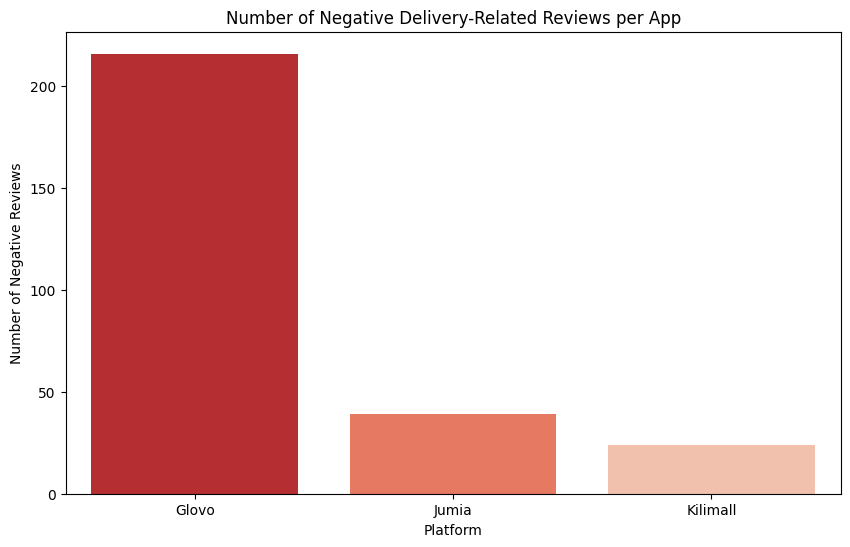

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for negative reviews
negative_reviews_df = df_delivery[df_delivery['sentiment'] == 'Negative']

# Count the number of negative reviews per app
negative_counts = negative_reviews_df['app'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_counts.index, y=negative_counts.values, palette='Reds_r')
plt.title('Number of Negative Delivery-Related Reviews per App')
plt.xlabel('Platform')
plt.ylabel('Number of Negative Reviews')
plt.show()